In [31]:
import pandas as pd

from alphax.dataset import DATASET_DIR

train_data = pd.read_csv(f"{DATASET_DIR}/candle/5m/DOGE_USDT:USDT_2024-01-01 00:00:00_2024-07-01 00:00:00.csv")

# 删除不需要的列
train_data.drop(columns=["high", "low", "open","volume"], inplace=True)
train_data.head()

,timestamp,close
0,2023-12-31 16:00:00,0.09018
1,2023-12-31 16:05:00,0.09023
2,2023-12-31 16:10:00,0.09044
3,2023-12-31 16:15:00,0.09043
4,2023-12-31 16:20:00,0.09046


In [37]:
# 构建涨幅率，涨幅率 = (后一行的close - 当前一行close) / 当前一行的close
train_data['price_rate'] =  (train_data["close"].shift(-1) - train_data["close"]) / train_data["close"]
train_data['price_rate_5'] =  (train_data["close"].shift(-10) - train_data["close"]) / train_data["close"]
train_data['price_rate_5x'] = train_data['price_rate_5']*100
train_data['target'] = train_data['price_rate'] > 0.002
# 统计一下target为true的数量

train_data.dropna(inplace=True)
train_data.head(100)

,timestamp,close,price_rate,price_rate_5,price_rate_5x,target,rsi,rsi_slope,rsi_category
17,2023-12-31 17:25:00,0.09039,-0.000221,0.001217,0.121695,False,55.350851,-7.516180,neutral_high
18,2023-12-31 17:30:00,0.09037,0.000443,0.000221,0.022131,False,54.213891,-8.804224,neutral_high
19,2023-12-31 17:35:00,0.09041,0.000221,0.000774,0.077425,False,56.153741,-5.795266,neutral_high
20,2023-12-31 17:40:00,0.09043,0.002543,0.001548,0.154816,True,57.131710,0.728243,neutral_high
21,2023-12-31 17:45:00,0.09066,0.000000,-0.000662,-0.066181,False,66.410290,3.756717,neutral_high
...,...,...,...,...,...,...,...,...,...
112,2024-01-01 01:20:00,0.08997,0.000000,0.001000,0.100033,False,58.033892,3.076896,neutral_high
113,2024-01-01 01:25:00,0.08997,0.000889,0.000556,0.055574,False,58.033892,1.782361,neutral_high
114,2024-01-01 01:30:00,0.09005,0.000777,-0.000444,-0.044420,False,60.507076,1.653225,neutral_high
115,2024-01-01 01:35:00,0.09012,0.000111,-0.001221,-0.122059,False,62.584848,1.612605,neutral_high


In [33]:
from talib import RSI

rsi_period = 14  # RSI周期设置为14个5分钟K线
train_data['rsi'] = RSI(train_data['close'], timeperiod=rsi_period)

train_data.dropna(inplace=True)

In [34]:
from alphax.core.utils.math_util import MathUtil

# 计算斜率
window = 4
# 根据window的大小，构建一个x轴的坐标
x = list(range(window))

train_data['rsi_slope'] = train_data['rsi'].rolling(window=window).apply(lambda y:MathUtil.slope(x,y), raw=True)
bins = [0, 30, 50, 70, 100]
labels = ['oversold', 'neutral_low', 'neutral_high', 'overbought']
train_data['rsi_category'] = pd.cut(train_data['rsi'], bins=bins, labels=labels)
train_data.dropna(inplace=True)
train_data.head()


,timestamp,close,price_rate,price_rate_5,price_rate_5x,target,rsi,rsi_slope,rsi_category
17,2023-12-31 17:25:00,0.09039,-0.000221,0.001217,0.121695,False,55.350851,-7.516180,neutral_high
18,2023-12-31 17:30:00,0.09037,0.000443,0.000221,0.022131,False,54.213891,-8.804224,neutral_high
19,2023-12-31 17:35:00,0.09041,0.000221,0.000774,0.077425,False,56.153741,-5.795266,neutral_high
20,2023-12-31 17:40:00,0.09043,0.002543,0.001548,0.154816,True,57.131710,0.728243,neutral_high
21,2023-12-31 17:45:00,0.09066,0.000000,-0.000662,-0.066181,False,66.410290,3.756717,neutral_high


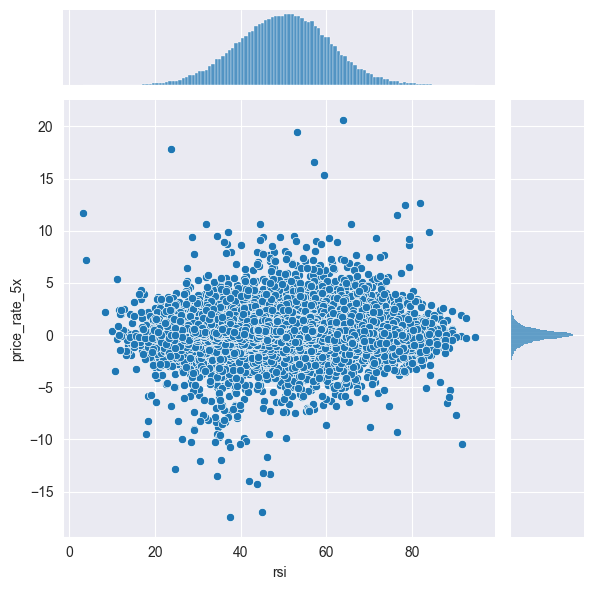

In [35]:
# 用plot 展示一下 price_diff_rate 在 macd_hist_slope 下的分布
import matplotlib.pyplot as plt
import seaborn as sns
# 求一个数字的绝对值

# filtered_df = train_data[train_data['price_rate']>0.02 ]
# filtered_df = train_data[train_data['macd_hist_slope']]
filtered_df = train_data
sns.jointplot(x='rsi', y='price_rate_5x', data=filtered_df, kind='scatter')
plt.show()
